# 2 часть работы аналитическая

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = '/content/drive/My Drive/Data/'
step_1_file = f"{data_path}/step-1-data-preparation.xlsx"
df_marketing = pd.read_excel(io=step_1_file, sheet_name ='Маркетинговые данные', decimal=",")
df_reference = pd.read_excel(io=step_1_file, sheet_name ='Справочник', decimal=",")
df_crm_data = pd.read_excel(io=step_1_file, sheet_name ='Данные из CRM', decimal=",")

In [4]:
df_marketing.head(5)

,Client ID,Domain,City,Region,Browser,Device Category,Date,Pageviews,Campaign,Keyword,...,Bounce Rate,Sessions,Goal Completion Location,Goal Completions,Goal Conversion Rate,Goal Value,Конверсия,Source conv.,Марка,Модель
0,GA1.2.1008664515.1580665610,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-02-02,2.0,(not set),(not set),...,0.0,1.0,/,0.0,0.0,0.0,0.0,BMW-keyauto-krd.ru,BMW,NaN
1,GA1.2.1018469100.1579095666,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-01-15,2.0,(not set),(not set),...,0.0,1.0,/,0.0,0.0,0.0,0.0,BMW-keyauto-krd.ru,BMW,NaN
2,GA1.2.1026472417.1566848988,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-01-06,2.0,(not set),(not set),...,0.0,1.0,/,0.0,0.0,0.0,0.0,BMW-keyauto-krd.ru,BMW,NaN
3,GA1.2.1033768264.1579957500,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-01-25,2.0,(not set),(not set),...,0.0,1.0,/,0.0,0.0,0.0,0.0,BMW-keyauto-krd.ru,BMW,NaN
4,GA1.2.1034147636.1574186800,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-01-25,2.0,(not set),(not set),...,0.0,1.0,/,0.0,0.0,0.0,0.0,BMW-keyauto-krd.ru,BMW,NaN


In [5]:
df_marketing.dtypes

Client ID                           object
Domain                              object
City                                object
Region                              object
Browser                             object
Device Category                     object
Date                        datetime64[ns]
Pageviews                          float64
Campaign                            object
Keyword                             object
Medium                              object
Source                              object
Avg. Session Duration              float64
Bounce Rate                        float64
Sessions                           float64
Goal Completion Location            object
Goal Completions                   float64
Goal Conversion Rate               float64
Goal Value                         float64
Конверсия                          float64
Source conv.                        object
Марка                               object
Модель                              object
dtype: obje

## Из каких регионов больше всего заявок

<BarContainer object of 20 artists>

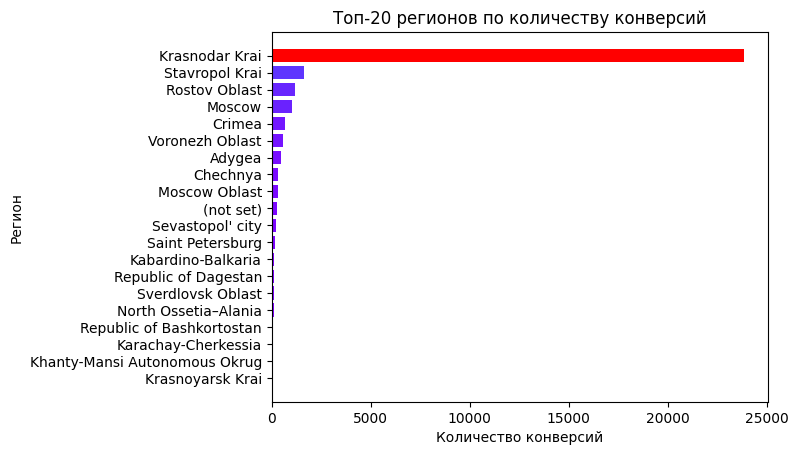

In [6]:
conversion_by_region = df_marketing.groupby('Region').agg(conversion_sum =('Конверсия','sum')).sort_values('conversion_sum', ascending=False).head(20)
conversion_by_region = conversion_by_region.sort_values('conversion_sum')

norm   = plt.Normalize(0, conversion_by_region.conversion_sum.max())
colors = plt.cm.rainbow(conversion_by_region.apply(norm))

plt.title('Топ-20 регионов по количеству конверсий')
plt.xlabel('Количество конверсий')
plt.ylabel('Регион')
plt.barh(y=conversion_by_region.index, width=conversion_by_region['conversion_sum'], color=colors)

**Вывод:** больше всего заявок из Краснодарского края, Ставропольского края и Ростовской области.

## Какой средний процент отказов (Bounce)

In [7]:
print(f"{df_marketing['Bounce Rate'].mean() * 100:.2f}" + "%")

0.23%


**Вывод:** средний процент отказов = 0.23%

## С каких устройств чаще заходят на сайты

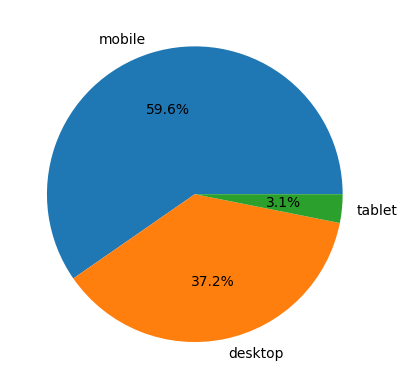

In [8]:
data = df_marketing['Device Category'].value_counts()

names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%', labels=names);

**Вывод:** чаще всего заходят с мобильных устройств.

## Какие источники наиболее конвертируемые

<BarContainer object of 20 artists>

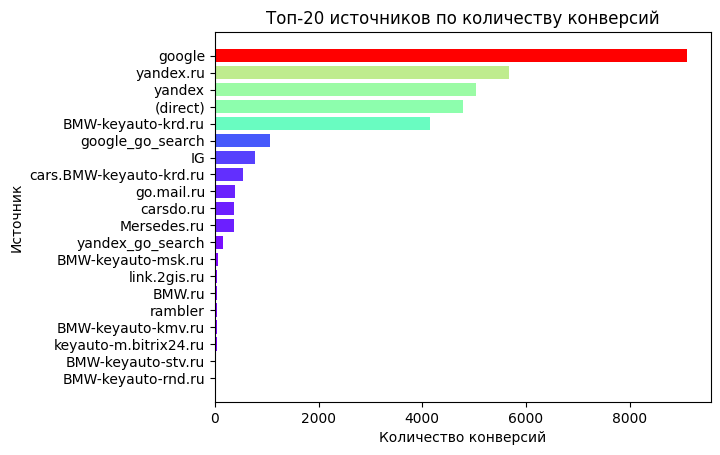

In [9]:
conversion_by_source = df_marketing.groupby('Source').agg(conversion_sum =('Конверсия','sum')).sort_values('conversion_sum', ascending=False).head(20)
conversion_by_source = conversion_by_source.sort_values('conversion_sum')

norm   = plt.Normalize(0, conversion_by_source.conversion_sum.max())
colors = plt.cm.rainbow(conversion_by_source.apply(norm))

plt.title('Топ-20 источников по количеству конверсий')
plt.xlabel('Количество конверсий')
plt.ylabel('Источник')
plt.barh(y=conversion_by_source.index, width=conversion_by_source['conversion_sum'], color=colors)

**Вывод:** наиболее конвертируемые источники - это поисковые системы.

## Рассчитайте ROMI (при расчете придумайте методологию расчета средней стоимость проданного автомобиля)

In [10]:
romi_value = (df_crm_data['Продажа'].sum() * df_reference['Цена в рублях']).mean() / df_marketing['Goal Value'].sum()
print(f"{romi_value:.2f}")

24.50


**Вывод:** ROMI = 24,5

## Посчитайте выручку в рублях только по долларовым позициям

In [11]:
df_join = pd.merge(df_marketing, df_reference, left_on='Модель', right_on='Модель')

revenue_in_dollar = df_join[df_join['Валюта'] == "Доллар США"]['Маржа в рублях'].sum()

print(f"{revenue_in_dollar:.2f}")

48057891.89


**Вывод:** выручка в рублях = 48057891 рублей 89 копеек

## Определите, какой источник трафика наиболее выгоден для компании по текущим данным

## Ответьте на вопрос: каких показателей не хватает, чтобы посчитать чистую прибыль?

Первоначальной стоимости проданного автомобиля и издержек потраченный на работу

## Сделать прогноз до конца февраля по количеству конверсий на каждый день

В файле Excel на листе "Прогноз"

## Какая будет выручка за первый квартал, если средняя стоимость авто останется неизменной, а продажи будут пропорциональны текущим данным?

In [12]:
revenue_day = df_join['Маржа в рублях'].sum() / len(df_join['Маржа в рублях'])
quartal_revenue = revenue_day * 120
print(f"{quartal_revenue:.2f}")

95884030.91


**Вывод:** Выручка за первый квартал = 95884030 рублей 91 копеек